In [245]:
import pandas as pd
import numpy as np
import seaborn as sns

In [246]:
df=pd.read_csv('PS4_GamesSales.csv',encoding = "ISO-8859-1") #loads data

In [247]:
df.shape

(1034, 9)

In [248]:
print("The number of rows are", df.shape[0],"\n The number of columns are ",df.shape[1])

The number of rows are 1034 
 The number of columns are  9


In [249]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [250]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
1031,The Mummy Demastered,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0
1033,Battle Chef Brigade,NaN,Action,NaN,0.0,0.0,0.0,0.0,0.0


In [251]:
df.nunique()

Game             1031
Year                8
Genre              17
Publisher         152
North America     129
Europe            139
Japan              45
Rest of World      85
Global            206
dtype: int64

Data on 17 genres of video games collected across 8 different years. Information collected in 85 countries outside of North America, Europe, and Japan. 

In [252]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [253]:
df.drop(['Game','Publisher','North America','Europe','Japan','Global'], axis=1, inplace=True)

In [254]:
df.dropna(inplace=True)

In [255]:
df.shape

(825, 3)

In [256]:
df.tail()

,Year,Genre,Rest of World
1025,2019.0,Action,0.0
1026,2017.0,Platform,0.0
1027,2017.0,Adventure,0.0
1028,2018.0,Action,0.0
1030,2017.0,Racing,0.0


In [257]:
df.reset_index(drop=True, inplace=True)

In [258]:
df

,Year,Genre,Rest of World
0,2014.0,Action,3.02
1,2015.0,Shooter,2.44
2,2018.0,Action-Adventure,2.26
3,2017.0,Shooter,2.12
4,2017.0,Sports,1.73
...,...,...,...
820,2019.0,Action,0.00
821,2017.0,Platform,0.00
822,2017.0,Adventure,0.00
823,2018.0,Action,0.00


How many genres and what are they?

In [259]:
print('There are '+str(df.Genre.nunique())+' genres which are: ')
print(df.Genre.unique())

There are 17 genres which are: 
['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Role-Playing' 'Misc'
 'Platform' 'Racing' 'Fighting' 'Adventure' 'MMO' 'Simulation' 'Music'
 'Party' 'Strategy' 'Puzzle' 'Visual Novel']


How many games were sold in each genre and what were the games?

How many games sold in each genre?

In [260]:
vs=pd.DataFrame([df['Year'],df['Genre'],df['Rest of World']]).T

In [261]:
vs.head()

,Year,Genre,Rest of World
0,2014.0,Action,3.02
1,2015.0,Shooter,2.44
2,2018.0,Action-Adventure,2.26
3,2017.0,Shooter,2.12
4,2017.0,Sports,1.73


In [262]:
vsAvg=vs.groupby(['Year','Genre']).count().reset_index()
vsAvg.head()

,Year,Genre,Rest of World
0,2013.0,Action,1
1,2013.0,Action-Adventure,1
2,2013.0,Fighting,1
3,2013.0,MMO,1
4,2013.0,Misc,4


In [263]:
vsAvg=vsAvg.drop('Year',axis=1)
vsAvg.columns=['Genre','Avg']
vsAvg=vsAvg.groupby(['Genre'])['Avg'].mean()
vsAvg.head()

Genre
Action              25.625000
Action-Adventure     5.428571
Adventure           11.833333
Fighting             5.333333
MMO                  1.600000
Name: Avg, dtype: float64

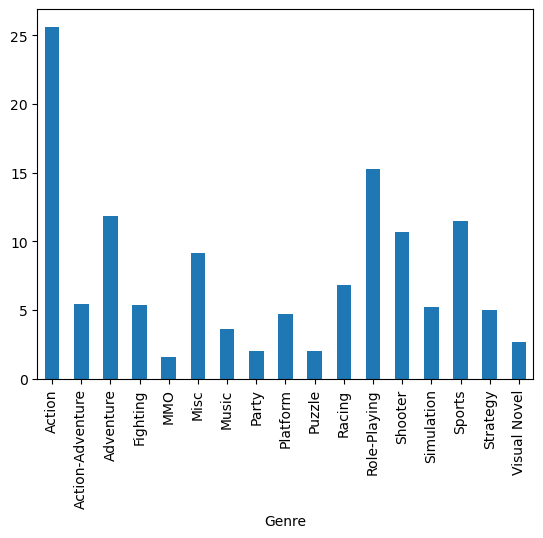

In [264]:
vsPlot=vsAvg.plot(kind='bar')

The graph shows that the top 3 genres for video game sales are action, role-playing, and sports.

Which year were the most games sold?

In [265]:
yv=pd.DataFrame([df['Year'],df['Rest of World']]).T
yv.head()

,Year,Rest of World
0,2014.0,3.02
1,2015.0,2.44
2,2018.0,2.26
3,2017.0,2.12
4,2017.0,1.73


In [266]:
yvTotal=yv.groupby(['Year']).count().reset_index()
yvTotal.columns=['Year','Total']
yvTotal

,Year,Total
0,2013.0,20
1,2014.0,98
2,2015.0,172
3,2016.0,222
4,2017.0,254
5,2018.0,39
6,2019.0,12
7,2020.0,8


Text(0.5, 1.0, '# of games sold per year')

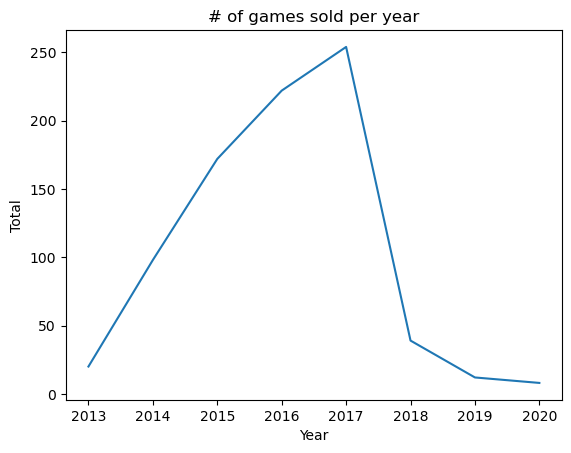

In [267]:
sns.lineplot(data=yvTotal, x="Year",y="Total").set_title('# of games sold per year')

Sales increased until 2017 and then a sharp decrease in 2018. 